In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

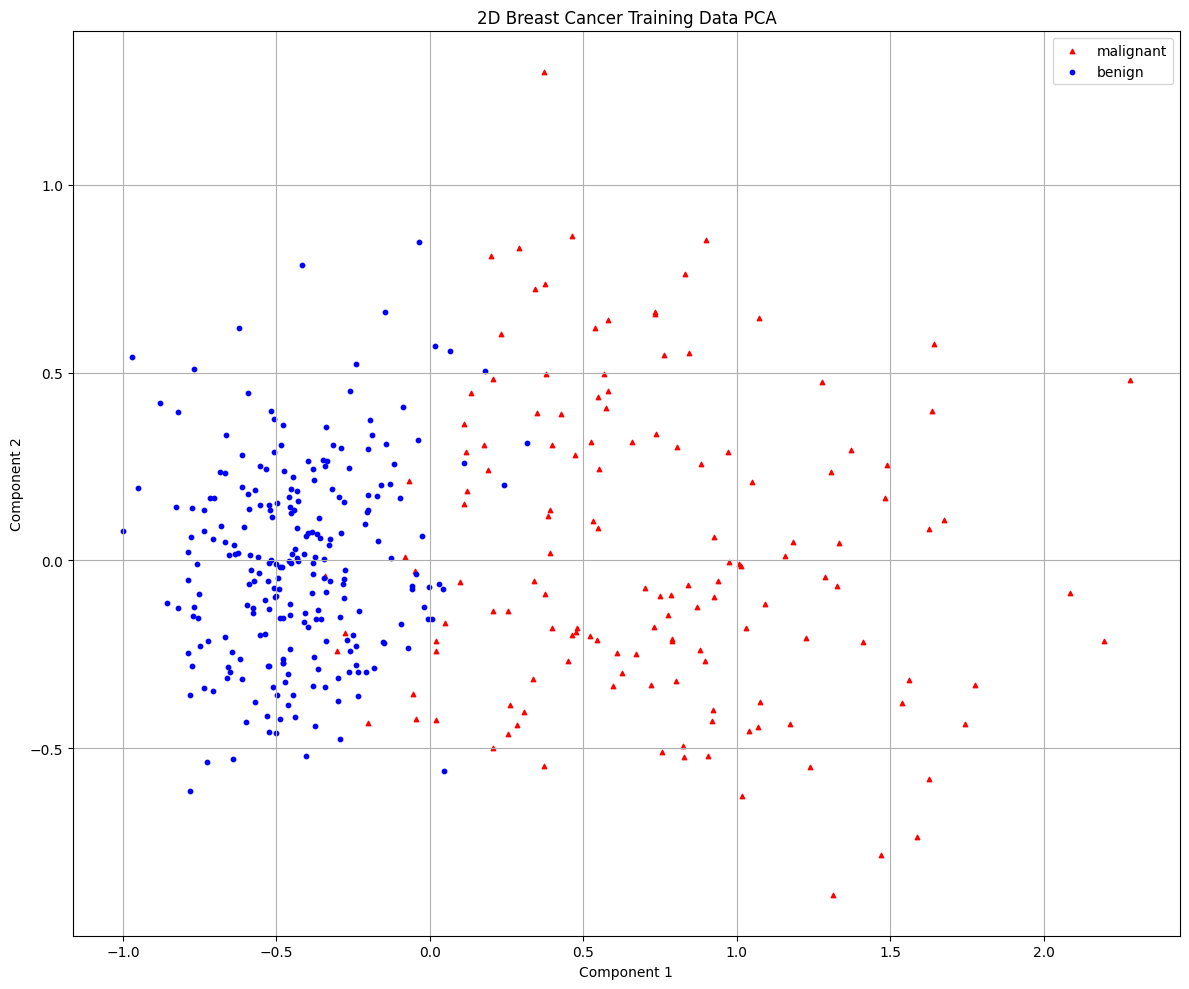

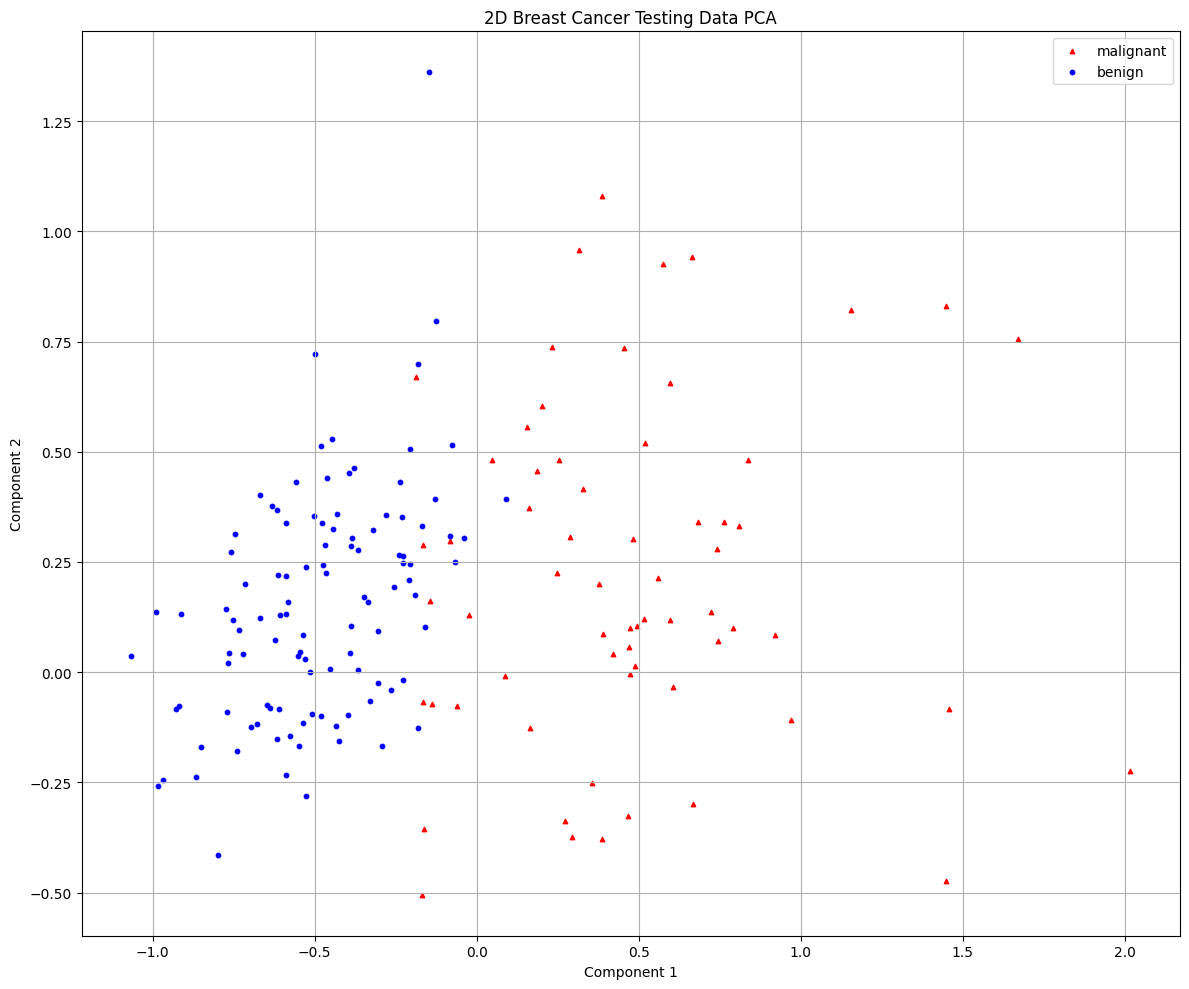

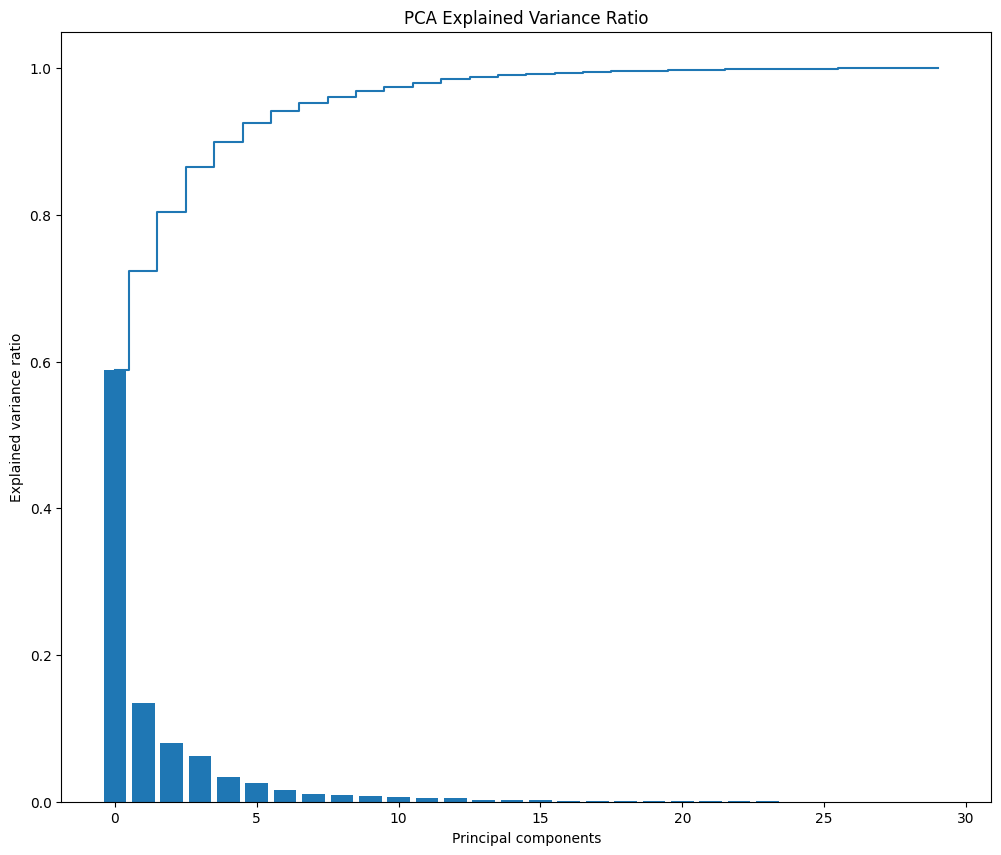

In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

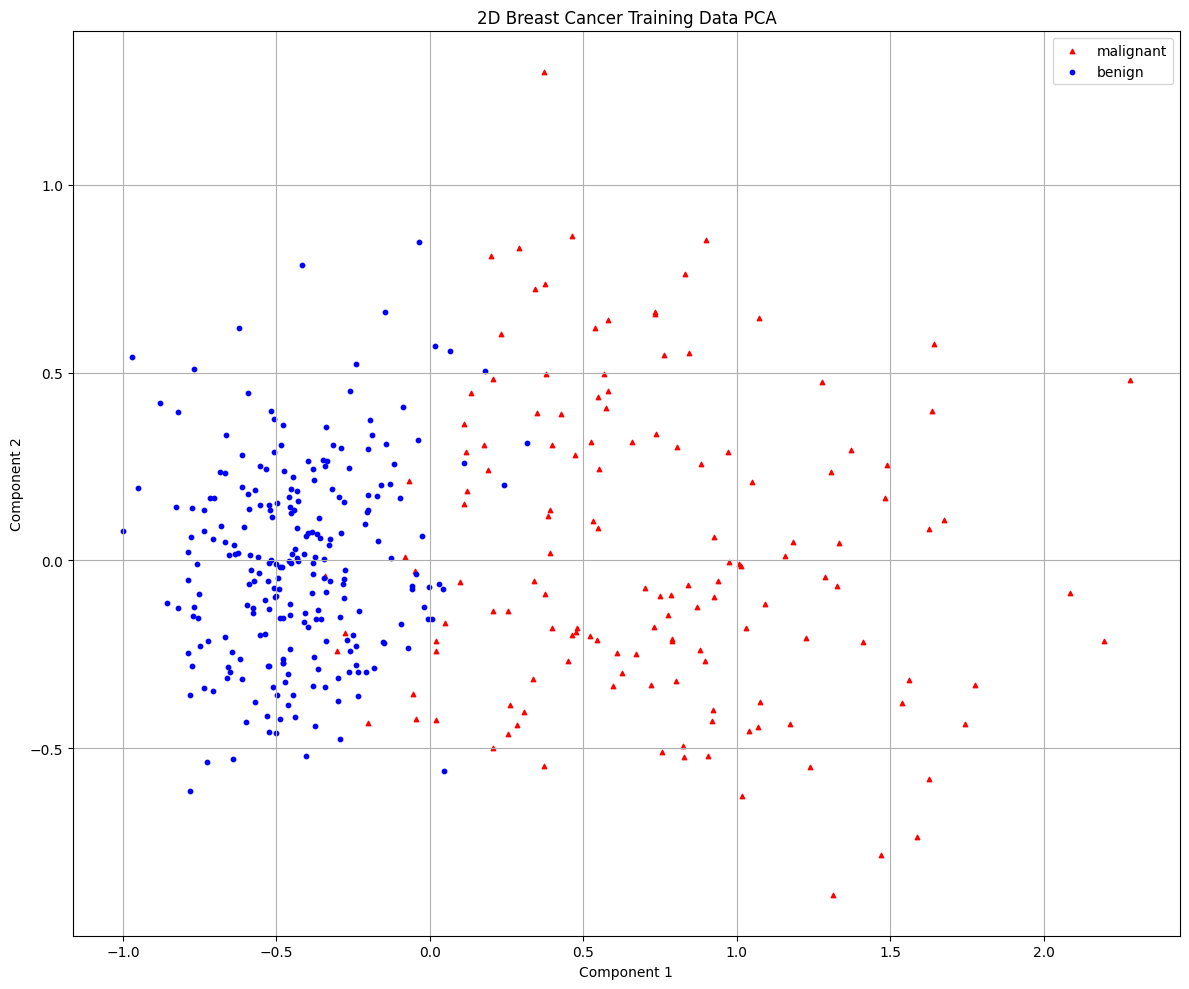

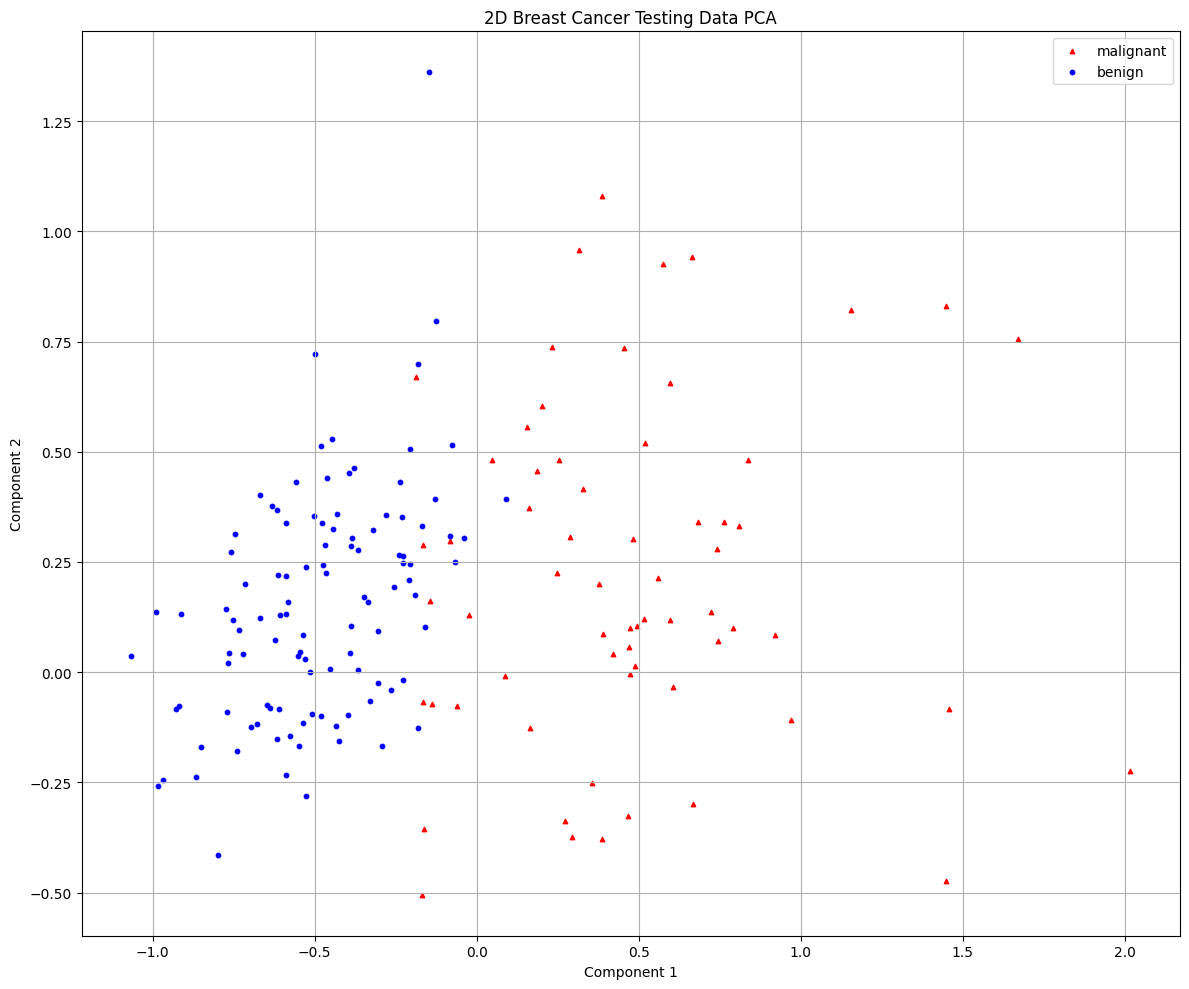

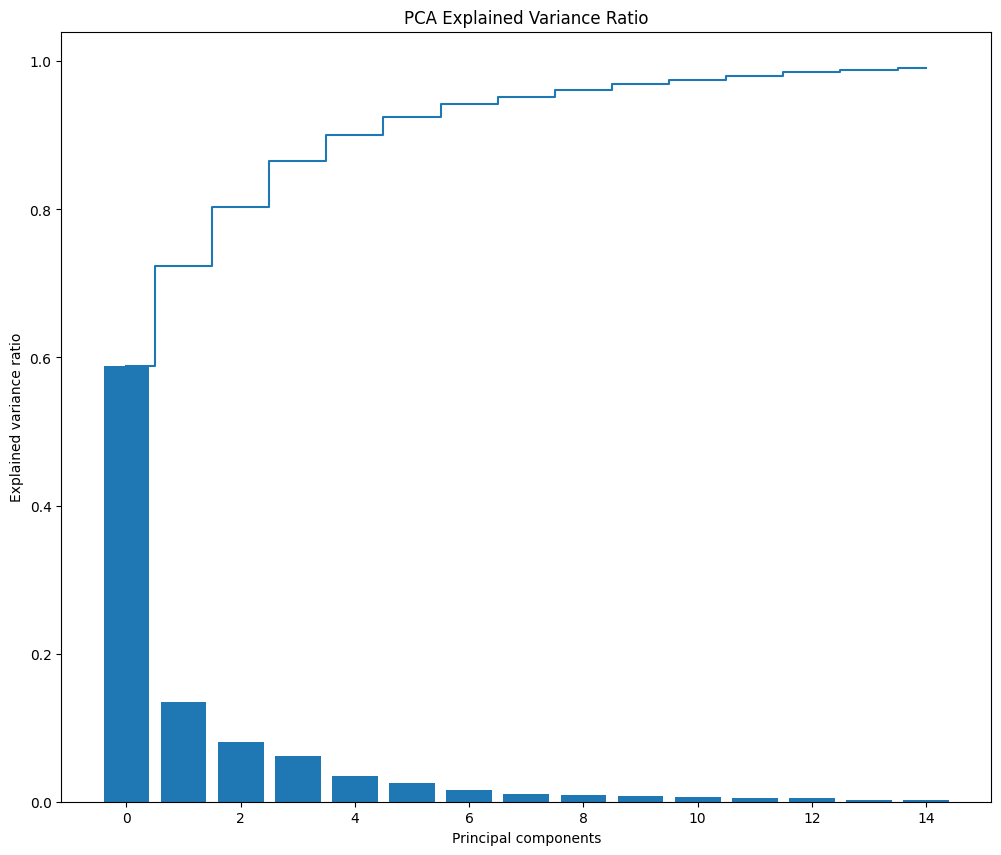

[I 2025-04-27 11:21:24,619] A new study created in memory with name: no-name-cf1feaca-8d77-470b-bc1d-b31c73febf96
[I 2025-04-27 11:21:24,640] Trial 0 finished with value: 0.9421052631578947 and parameters: {'C': 7.434534442826576, 'kernel': 'sigmoid', 'gamma': 0.008562665003230491, 'max_iter': 1399}. Best is trial 0 with value: 0.9421052631578947.
[I 2025-04-27 11:21:24,668] Trial 1 finished with value: 0.6263157894736843 and parameters: {'C': 0.014841637834116746, 'kernel': 'poly', 'gamma': 0.0075544481086659435, 'degree': 5, 'max_iter': 6130}. Best is trial 0 with value: 0.9421052631578947.
[I 2025-04-27 11:21:24,698] Trial 2 finished with value: 0.6263157894736843 and parameters: {'C': 0.13984693813506968, 'kernel': 'sigmoid', 'gamma': 0.004382436972485473, 'max_iter': 3666}. Best is trial 0 with value: 0.9421052631578947.
[I 2025-04-27 11:21:24,736] Trial 3 finished with value: 0.6263157894736843 and parameters: {'C': 0.004593163012195915, 'kernel': 'rbf', 'gamma': 0.03131665821150

Best trial:
Accuracy: 0.9815789473684211
Best hyperparameters:  {'C': 8.331753838843133, 'kernel': 'sigmoid', 'gamma': 0.175203378895136, 'max_iter': 470}


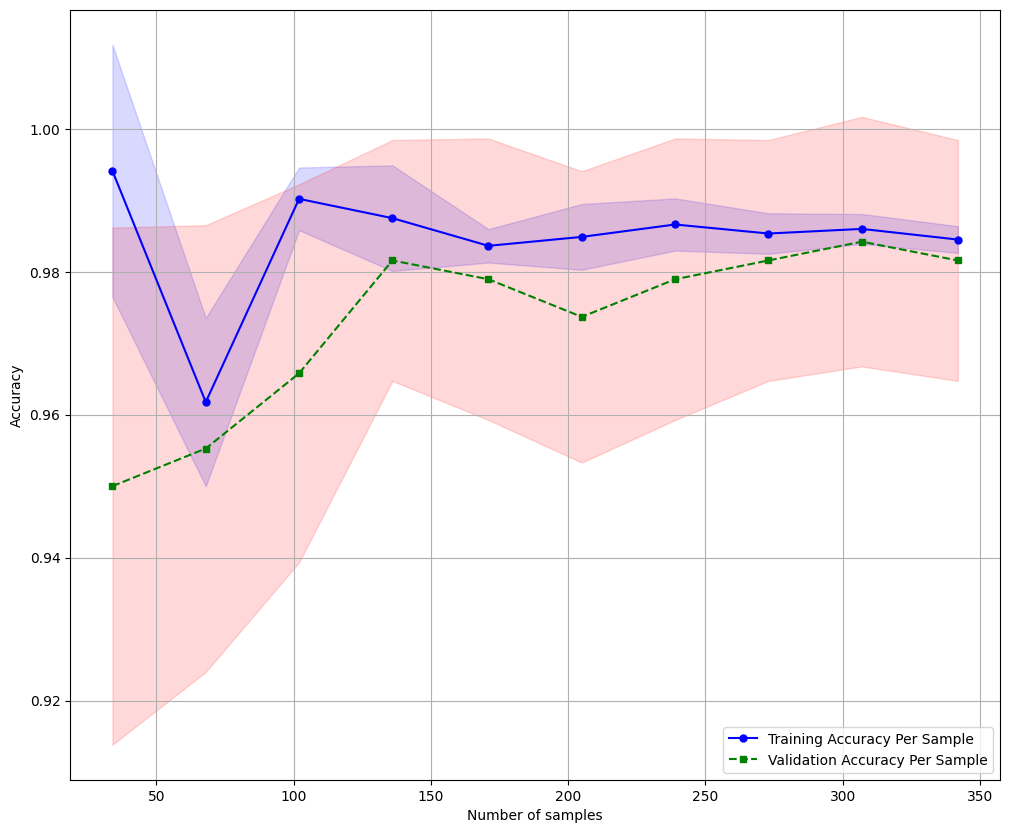

Confusion Matrix
[[ 52  12]
 [  0 107]]
Accuracy: 0.9298, Precision: 0.8992, Recall: 1.0000, F1: 0.9469, AUC: 0.9901


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)